In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
np.set_printoptions(precision=2)
pd.set_option('precision', 2)
np.set_printoptions(suppress=True)
sns.set(style='whitegrid')

In [3]:
#1. Load training and test datasets

train_path = 'data/train.csv'
test_path = 'data/test.csv'
train_data = pd.read_csv(train_path, index_col='PassengerId')
test_data = pd.read_csv(test_path, index_col='PassengerId')

#1a. Seperate features and target from training dataset.

features = train_data.iloc[:,1:]
target = train_data.loc[:, ['Survived']]
print('Train Set Size : ', train_data.shape)
print('Test Set Size : ', test_data.shape)
print('Train Features Size : ', features.shape)
num_train_rows = train_data.shape[0]
num_test_rows = test_data.shape[0]

#1b. Merge training and test datasets to cover all 
#encodings for categorical features

all_data = pd.concat((features, test_data)).reset_index(drop=True)

Train Set Size :  (891, 11)
Test Set Size :  (418, 10)
Train Features Size :  (891, 10)


In [4]:
#2. Find Columns that have Missing Data

null_features = all_data.columns[all_data.isnull().any()]
missing_ratio = (all_data[null_features].isnull().sum()/len(all_data)) * 100
missing_data = pd.DataFrame({'Missing Ratio' :missing_ratio})
print(missing_data.sort_values(by='Missing Ratio',ascending=False))

          Missing Ratio
Cabin             77.46
Age               20.09
Embarked           0.15
Fare               0.08


c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


assenger class :  1
Common fare in above passenger class :  26.55
assenger class :  2
Common fare in above passenger class :  13.0
assenger class :  3
Common fare in above passenger class :  8.05


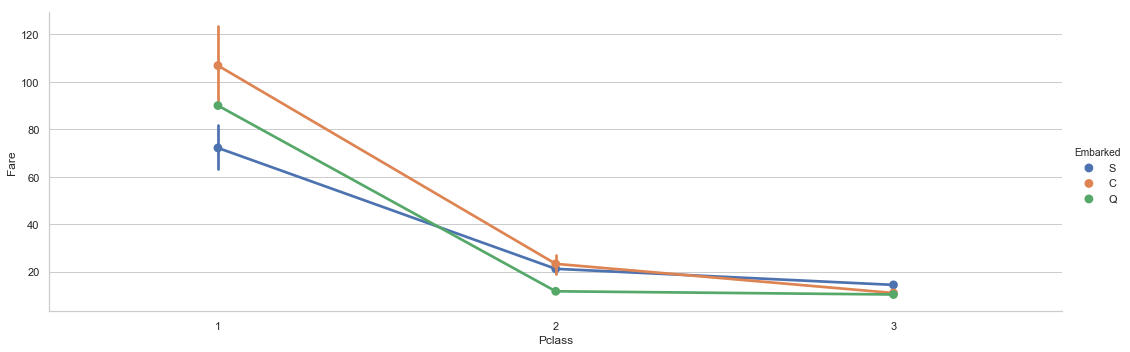

In [5]:
#3. Fill Missing Data

#3a. Since fare changes as per passenger class, 
#select mode of Pclass and assign it to missing fare values.

sns.factorplot(x="Pclass", y="Fare", hue='Embarked', data=all_data, size=5, aspect=3)
Pclass_groupby_obj = all_data.groupby(['Pclass'])['Fare']
for name, group in Pclass_groupby_obj:
    print('assenger class : ', name)
    print('Common fare in above passenger class : ', group.mode()[0])

all_data['Fare'] = \
    all_data.groupby(['Pclass'])['Fare'].apply(lambda x : x.fillna(x.mode()[0]))


#3b. Fill missing Embarked values

all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])

#3c. Create a new column FAMILYSIZE that combines parents, spouse and siblings
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp']

#3d. I observed that NAME column contains Title such as Mr, Miss, Master etc
# Derive TITLE from NAME and select mode of each group 
# and assign it to missing Age values in that group.

title = []
for index, row in all_data.iterrows():
    title.append(row.Name.split(',')[1].split('.')[0].strip())
all_data['Title'] = title

#replace various titles with more common titles
all_data.loc[all_data['Title']=='the Countess', 'Title'] = 'Royal'
all_data.loc[all_data['Title']=='Lady', 'Title'] = 'Royal'
all_data.loc[all_data['Title']=='Sir', 'Title'] = 'Royal'
all_data.loc[all_data['Title']=='Capt', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Col', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Don', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Dr', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Major', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Rev', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Jonkheer', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Dona', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Mlle', 'Title'] = 'Miss'
all_data.loc[all_data['Title']=='Ms', 'Title'] = 'Miss'
all_data.loc[all_data['Title']=='Mme', 'Title'] = 'Rare'

pd.crosstab(all_data['Title'], all_data['Sex'])
#1,2, 4, 9 all have same counts. So, choosen 1 for master age mode
master_age_mode = all_data.loc[all_data['Title']=='Master', 'Age'].mode()[0]
miss_age_mode = all_data.loc[all_data['Title']=='Miss', 'Age'].mode()[0]
mr_age_mode = all_data.loc[all_data['Title']=='Mr', 'Age'].mode()[0]
mrs_age_mode = all_data.loc[all_data['Title']=='Mrs', 'Age'].mode()[0]
rare_age_mode = all_data.loc[all_data['Title']=='Rare', 'Age'].mode()[0]
royal_age_mode = all_data.loc[all_data['Title']=='Royal', 'Age'].mode()[0]

all_data['Age'] = \
    all_data.groupby(['Title'])['Age'].apply(lambda x : x.fillna(x.mode()[0]))

In [6]:
#3d. Drop unnecessary columns and
#    Confirm that all columns have no missing values

all_data["CabinBool"] = (all_data["Cabin"].notnull().astype('int'))
all_data['CabinBool'] = all_data['CabinBool'].astype('object')
all_data['Pclass'] = all_data['Pclass'].astype('object')
all_data.drop(columns = ['Name', 'Ticket', 'Title', 'Cabin', 'Parch', 'SibSp'], inplace=True)


null_features = all_data.columns[all_data.isnull().any()]
missing_ratio = (all_data[null_features].isnull().sum()/len(all_data)) * 100
missing_data = pd.DataFrame({'Missing Ratio' :missing_ratio})
print(missing_data.sort_values(by='Missing Ratio',ascending=False))

all_data.info()

Empty DataFrame
Columns: [Missing Ratio]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Pclass        1309 non-null object
Sex           1309 non-null object
Age           1309 non-null float64
Fare          1309 non-null float64
Embarked      1309 non-null object
FamilySize    1309 non-null int64
CabinBool     1309 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 71.7+ KB


In [7]:
'''
            4. KNN Model with randomly choosen parameters
'''

all_data = pd.get_dummies(all_data)
all_data = all_data[['Age','Fare','FamilySize','Pclass_1',
    'Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C',
    'Embarked_Q','Embarked_S','CabinBool_0','CabinBool_1']]

train_features = all_data[:num_train_rows]
test_features = all_data[num_train_rows:]

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
X_train , X_test, y_train, y_test = train_test_split(train_features, target, test_size=0.2, random_state=0)

from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
k_class = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
k_class.fit(X_train, y_train)

y_predict = k_class.predict(X_test)
print('Accuracy : ', k_class.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy :  0.7932960893854749
[[94 16]
 [21 48]]


In [9]:
'''
            5. Tuning K-Nearest Neighbours.
               Selected optimal neghbour number.
'''

neighbour_list = np.linspace(5, 25, endpoint=False, num=10, dtype=int)
for neighbour_num in neighbour_list:
    print('neighbour_num : ', neighbour_num)
    k_class = KNeighborsClassifier(n_neighbors=neighbour_num, metric='minkowski', p=2)
    k_class.fit(X_train, y_train)
    y_predict = k_class.predict(X_test)
    print('Accuracy : ', k_class.score(X_test, y_test))
    conf_matrix = confusion_matrix(y_test, y_predict)
    print(conf_matrix)
    

neighbour_num :  5
Accuracy :  0.7932960893854749
[[94 16]
 [21 48]]
neighbour_num :  7
Accuracy :  0.7877094972067039
[[94 16]
 [22 47]]
neighbour_num :  9
Accuracy :  0.8044692737430168
[[98 12]
 [23 46]]
neighbour_num :  11
Accuracy :  0.7877094972067039
[[95 15]
 [23 46]]
neighbour_num :  13
Accuracy :  0.7877094972067039
[[97 13]
 [25 44]]
neighbour_num :  15
Accuracy :  0.7988826815642458
[[97 13]
 [23 46]]
neighbour_num :  17
Accuracy :  0.8156424581005587
[[98 12]
 [21 48]]
neighbour_num :  19
Accuracy :  0.8044692737430168
[[97 13]
 [22 47]]
neighbour_num :  21
Accuracy :  0.8044692737430168
[[101   9]
 [ 26  43]]
neighbour_num :  23
Accuracy :  0.8100558659217877
[[99 11]
 [23 46]]


c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\ipyk

In [10]:
'''
            6. KNN Model with n_neighbors = 17 and distance metric = manhattan
'''

X_train , X_test, y_train, y_test = train_test_split(train_features, target, test_size=0.2, random_state=0)

from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

k_class = KNeighborsClassifier(n_neighbors=17, metric='manhattan')
k_class.fit(X_train, y_train)

y_predict = k_class.predict(X_test)
print('Accuracy : ', k_class.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

Accuracy :  0.8212290502793296
[[99 11]
 [21 48]]


c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
